Считывание 1000 вакансий с hh.ru

In [21]:
#coding: utf-8
import requests
import matplotlib.pyplot as plt
import numpy as np

arr1=[]
for i in range(10):
    adri='https://api.hh.ru/vacancies?per_page=100&page='+str(i)+'&text=machine+learning+OR+data+science+OR+data+analytics'
    req=requests.get(adri)
    arr1+=(req.json()['items'])

Обработка данных. Вакансии лежат в массиве из 10 словарей. 

In [22]:
slovo={}

#получаем slovo "профессия: зарплата" 
for i in arr1:    #i-тнутый элемент массива, являющийся словарем
    if ((i['salary']!=None) and (i['salary']['currency']=='RUR')):
        if (i['salary']['from']==None):
            slovo[i['name']]=i['salary']['to']/2
        elif (i['salary']['to']==None):
            slovo[i['name']]=i['salary']['from']
        elif((i['salary']['to']!=None) and (i['salary']['from']!=None)):
            slovo[i['name']]=(i['salary']['from']+i['salary']['to'])/2
    if ((i['salary']!=None) and (i['salary']['currency']=='USD')):
        if (i['salary']['from']==None):
            slovo[i['name']]=i['salary']['to']/2*57
        elif (i['salary']['to']==None):
            slovo[i['name']]=i['salary']['from']*57
        elif((i['salary']['to']!=None) and (i['salary']['from']!=None)):
            slovo[i['name']]=(i['salary']['from']+i['salary']['to'])/2*57
    if ((i['salary']!=None) and (i['salary']['currency']=='EUR')):
        if (i['salary']['from']==None):
            slovo[i['name']]=i['salary']['to']/2*71
        elif (i['salary']['to']==None):
            slovo[i['name']]=i['salary']['from']*71
        elif((i['salary']['to']!=None) and (i['salary']['from']!=None)):
            slovo[i['name']]=(i['salary']['from']+i['salary']['to'])/2*71
DS=[]
ML=[]
DA=[]
Prog=[]
Razr=[]

for j in slovo: #ключи(j) - это названия вакансий
    if (('achine' and 'earn') or('ашинному')) in j:
        ML.append(slovo[j])
    elif ('ata' and 'cien') in j:
        DS.append(slovo[j])
    elif (('nalyst' and 'ata') or('налитик' and 'анных')) in j:
        DA.append(slovo[j])
    elif ('рограмм') in j:
        Prog.append(slovo[j])
    elif ('разработ') in j:
        Razr.append(slovo[j])
     
All=[]
All.append(DS)
All.append(ML)
All.append(DA)
All.append(Prog)
All.append(Razr)
#print(All)

Получение медианных значений зарплат и построение графика с соответствующими вакансиями

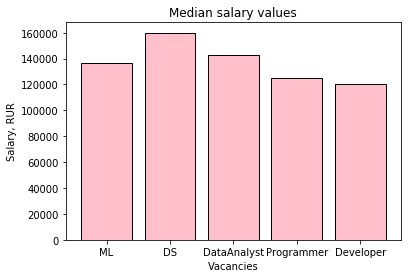

In [23]:
medi=[]

for i in All:
    i.sort()
    #print(i)    
    if (len(i))%2==1:
        lin1=len(i)//2+1
        med=i[lin1]
        medi.append(med)
    else:
        lin1=len(i)//2
        lin2=len(i)//2+1
        med=(i[lin1]+i[lin2])/2
        medi.append(med)

names=['ML', 'DS', 'DataAnalyst', 'Programmer', 'Developer']
print('Медианные значения зарплат:\n')
for i in range(5):
    print(names[i]+': '+str(medi[i]))
print('\n')
#print(medi)
#slovo

xdata1 = [0, 1, 2, 3, 4]
#fig, ax=plt.subplots()
plt.title('Median salary values')
plt.xlabel('Vacancies')
plt.ylabel('Salary, RUR')
#plt.figure()
#color=['red','yellow','green', 'blue','purple']
plt.bar(xdata1, medi, color='pink', edgecolor='black', label=names)
plt.xticks(xdata1,names, rotation='horizontal')
#plt.legend(names)
plt.show()

Получение распределения зарплат по диапазонам и построение графика

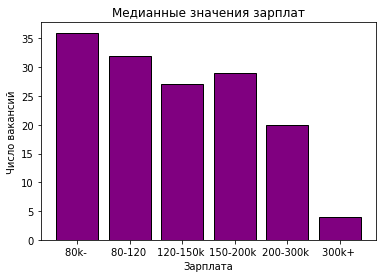

In [25]:
a=b=c=d=e=f=0
for key in slovo:
    if int(slovo[key])<80000:
        a+=1
    elif int(slovo[key])<120000:
        b+=1
    elif int(slovo[key])<150000:
        c+=1
    elif int(slovo[key])<200000:
        d+=1
    elif int(slovo[key])<300000:
        e+=1
    elif int(slovo[key])>=300000:
        f+=1
        
        
salr=['80k- ','80-120 ','120-150k ','150-200k ','200-300k ','300k+ ']
numb=[a,b,c,d,e,f]

print(u'Распределение вакансий по диапазонам зарплат:\n')
for i in range(6):
    print(str(salr[i])+str(numb[i])+' вакансий')

xdata2 = [0,1,2,3,4,5]
plt.title(u'Медианные значения зарплат')
plt.xlabel(u'Зарплата')
plt.ylabel(u'Число вакансий')
#plt.figure()
#colors=['red','orange','yellow','green', 'blue','purple']
plt.bar(xdata2, numb, color='purple', edgecolor='black')
plt.xticks(xdata2,salr, rotation='horizontal')
#plt.legend(salr)
plt.show()